In [1]:
import glob
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns


drz_dir = '/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean'

c = 'CONSEJO_CONSTITUCIONAL'
d = 'PRINCIPIOS_DERECHOS_CIVILES'
j = 'FUNCION_JURISDICCIONAL'
p = 'SISTEMA_POLITICO'
e = 'DERECHOS_ECONOMICOS_SOCIALES'

C = []
D = []
J = []
P = []
E = []

files = glob.glob(f'{drz_dir}/*.json')
files.sort()

for f in files:
    if c in f:
        C.append(f)
    elif d in f:
        D.append(f)
    elif j in f:
        J.append(f)
    elif p in f:
        P.append(f)
    elif e in f:
        E.append(f)

print('Consejo Constitucional:', len(C))
print('Derechos Civiles:', len(D))
print('Funcion Jurisdiccional:', len(J))
print('Sistema Politico:', len(P))
print('Derechos Economicos:', len(E))

Consejo Constitucional: 10
Derechos Civiles: 18
Funcion Jurisdiccional: 12
Sistema Politico: 17
Derechos Economicos: 13


In [2]:
print('Consejo Constitucional:', len(C))

Consejo Constitucional: 10


In [3]:
sns.set_theme(style="whitegrid")

def summarize_commision(L: list):

    invalid_files = []
    speaker_dict = {}
    for file in L:
        with open(file, 'r') as f:
            data = json.load(f)

        segments = data['speakers']

        for s in segments:
            if 'hablante_label' not in s:
                print(file)
                invalid_files.append(file)
                break  # We are only interested in labeled segments

            label = s['hablante_label']
            if 'SPEAKER' not in label:
                if label not in speaker_dict:
                    speaker_dict[label] = 0
                else:
                    segment_duration = s['end'] - s['start']
                    speaker_dict[label] += segment_duration
    
    speaker_dict = dict(sorted(speaker_dict.items(), key=lambda item: item[1], reverse=True))
    plt.figure(figsize=(12, 5))
    plt.bar(speaker_dict.keys(), speaker_dict.values())
    plt.xticks(fontsize=8, rotation=45, ha='right')
    plt.show()

    valid = list(set(L) - set(invalid_files))
    valid.sort()
    for f in valid:
        print(f)
    return speaker_dict

---
### Caracterización por comisión
Para ver qué playlists conviene descargar

Obtención de hablantes presentes en las sesiones (`speakers`)

### Consejo Constitucional

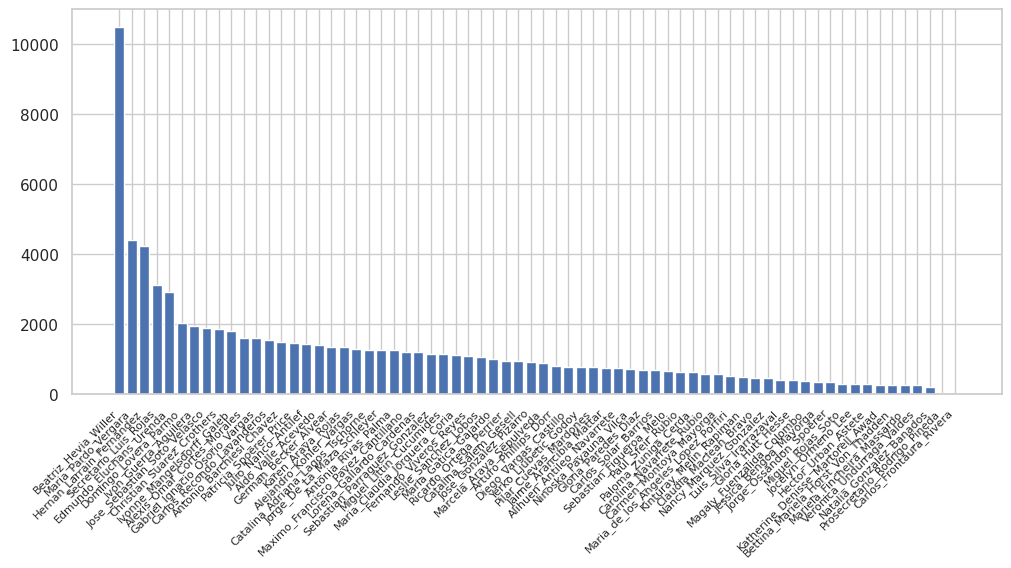

/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_18_CONSEJO_CONSTITUCIONAL.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_19_CONSEJO_CONSTITUCIONAL.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_20_CONSEJO_CONSTITUCIONAL.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_24_CONSEJO_CONSTITUCIONAL.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_27_CONSEJO_CONSTITUCIONAL.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_28_CONSEJO_CONSTITUCIONAL.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_30_CONSEJO_CONSTITUCIONAL.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_33_CONSEJO_CONSTITUCIONAL_(Parte_2).json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_34_CONSEJO_CONSTITUCIONAL.json
/home/edu/data/lab

In [4]:
C_dict = summarize_commision(C)
print(f"Cantidad de hablantes: {len(C_dict.keys())}")

Obtención de hablantes presentes en las sesiones (`speakers`)

### Derechos Civiles

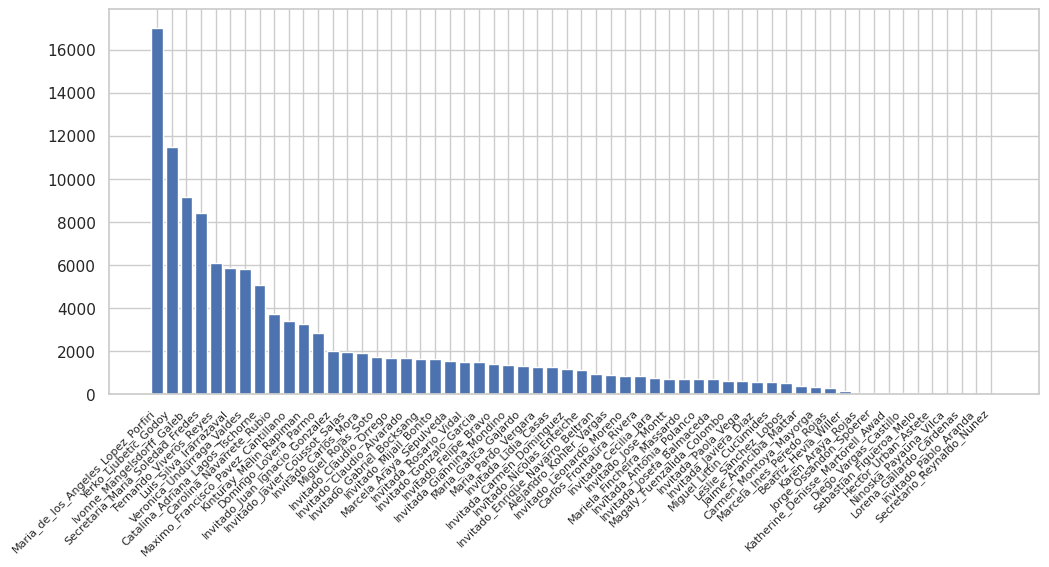

/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_0_COMISION_PRINCIPIOS_DERECHOS_CIVILES_Y_POLITICOS.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_10_COMISION_PRINCIPIOS_DERECHOS_CIVILES_Y_POLITICOS.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_20_COMISION_PRINCIPIOS_DERECHOS_CIVILES_Y_POLITICOS.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_26_COMISION_PRINCIPIOS_DERECHOS_CIVILES_Y_POLITICOS.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_30_COMISION_PRINCIPIOS_DERECHOS_CIVILES_Y_POLITICOS.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_31_COMISION_PRINCIPIOS_DERECHOS_CIVILES_Y_POLITICOS.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_32_COMISION_PRINCIPIOS_DERECHOS_CIVILES_Y_POLITICOS.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional

In [5]:
D_dict = summarize_commision(D)
print(f"Derechos Civiles: {len(D_dict.keys())}")

Obtención de hablantes presentes en las sesiones (`speakers`)

### Funcion Jurisdiccional

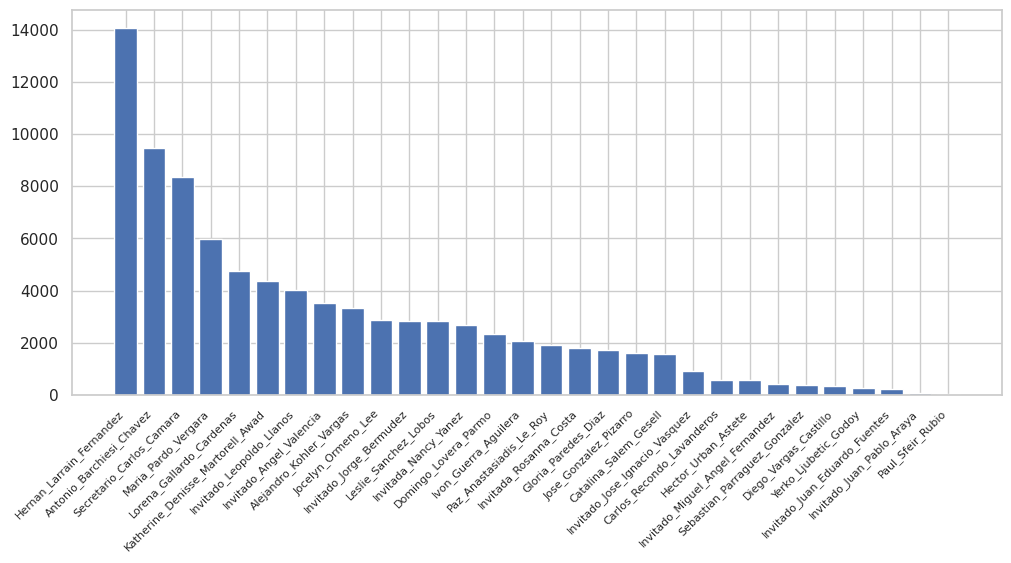

/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_02_COMISION_FUNCION_JURISDICCIONAL_Y_ORGANOS_AUTONOMOS.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_26_COMISION_FUNCION_JURISDICCIONAL_Y_ORGANOS_AUTONOMOS.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_27_COMISION_FUNCION_JURISDICCIONAL_Y_ORGANOS_AUTONOMOS.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_28_COMISION_FUNCION_JURISDICCIONAL_Y_ORGANOS_AUTONOMOS.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_29_COMISION_FUNCION_JURISDICCIONAL_Y_ORGANOS_AUTONOMOS.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_31_COMISION_FUNCION_JURISDICCIONAL_Y_ORGANOS_AUTONOMOS.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_33_COMISION_FUNCION_JURISDICCIONAL_Y_ORGANOS_AUTONOMOS.json
/home/edu/data/labels/backup-cnn/speaker/

In [6]:
J_dict = summarize_commision(J)
print(f"Funcion Jurisdiccional: {len(J_dict.keys())}")

Obtención de hablantes presentes en las sesiones (`speakers`)

### Sistema Politico

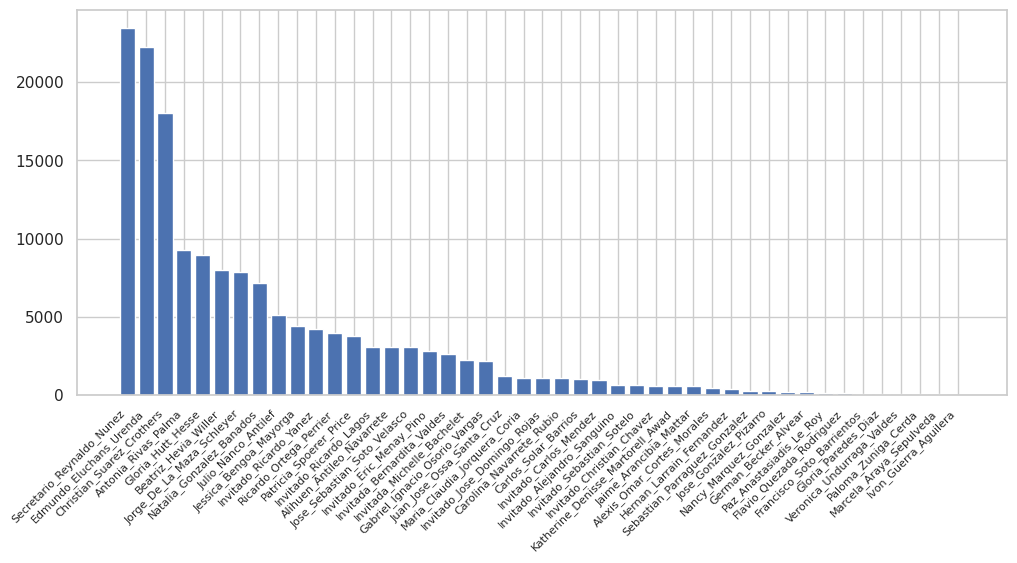

/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_11_COMISION_SISTEMA_POLITICO_REFORMA_CONSTITUCIONAL_Y_FORMA_DE_ESTADO.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_23_COMISION_SISTEMA_POLITICO_REFORMA_CONSTITUCIONAL_Y_FORMA_DE_ESTADO.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_28_COMISION_SISTEMA_POLITICO_REFORMA_CONSTITUCIONAL_Y_FORMA_DE_ESTADO.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_29_COMISION_SISTEMA_POLITICO_REFORMA_CONSTITUCIONAL_Y_FORMA_DE_ESTADO.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_30_COMISION_SISTEMA_POLITICO_REFORMA_CONSTITUCIONAL_Y_FORMA_DE_ESTADO.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_31_COMISION_SISTEMA_POLITICO_REFORMA_CONSTITUCIONAL_Y_FORMA_DE_ESTADO.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_32_COMISION

In [7]:
P_dict = summarize_commision(P)
print(f"Sistema Politico: {len(P_dict.keys())}")

### Derechos Economicos

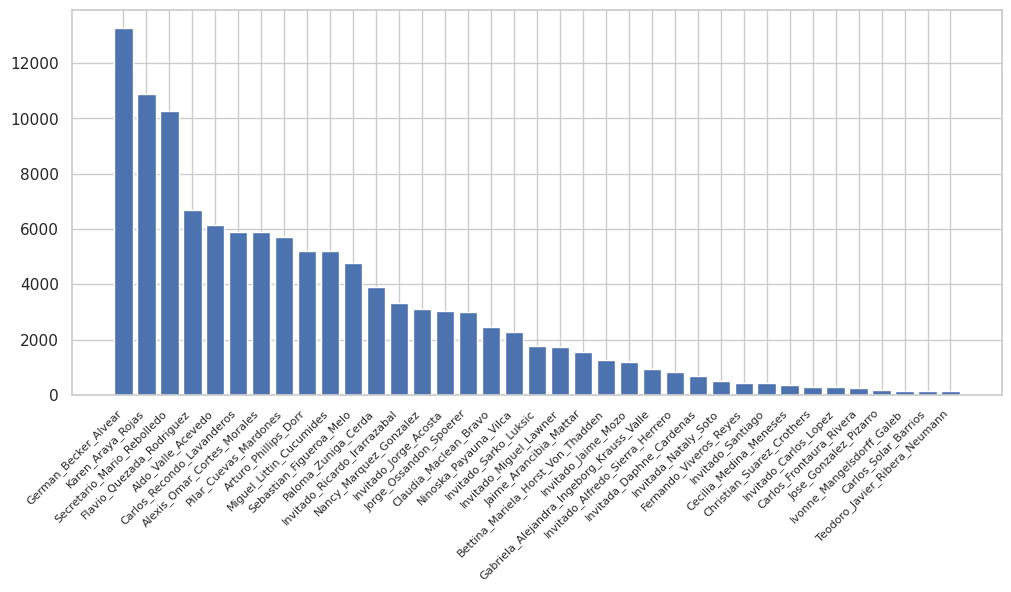

/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_15_COMISION_DERECHOS_ECONOMICOS_SOCIALES_CULTURALES_Y_AMBIENTALES.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_27_COMISION_DERECHOS_ECONOMICOS_SOCIALES_CULTURALES_Y_AMBIENTALES.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_28_COMISION_DERECHOS_ECONOMICOS_SOCIALES_CULTURALES_Y_AMBIENTALES.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_29_COMISION_DERECHOS_ECONOMICOS_SOCIALES_CULTURALES_Y_AMBIENTALES.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_31_COMISION_DERECHOS_ECONOMICOS_SOCIALES_CULTURALES_Y_AMBIENTALES.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_32_COMISION_DERECHOS_ECONOMICOS_SOCIALES_CULTURALES_Y_AMBIENTALES.json
/home/edu/data/labels/backup-cnn/speaker/consejo_constitucional_clean/SESION_33_COMISION_DERECHOS_ECONOMICOS_SOC

In [8]:
E_dict = summarize_commision(E)
print(f"Derechos Economicos: {len(E_dict.keys())}")

In [1]:
import os
import librosa

def get_audio_length_distribution(root_dir, threshold=30):
    distribution = {}

    # Traverse through the root directory
    for subdir, _, files in os.walk(root_dir):
        audio_info = {
            'count': 0,
            'total_duration': [],
            'file_names': []
        }

        # Process each file in the subdirectory
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(subdir, file)
                try:
                    # Load the audio file
                    audio, sr = librosa.load(file_path, sr=None)
                    # Get the length of the audio in seconds
                    length = librosa.get_duration(y=audio, sr=sr)
                    if length > threshold:
                        audio_info['count'] += 1
                        audio_info['total_duration'].append(length)
                        audio_info['file_names'].append(file)
                except Exception as e:
                    print(f"Could not process file {file_path}: {e}")

        

        if audio_info['count'] > 0:
            zipped_lists = zip(audio_info['total_duration'], audio_info['file_names'])

            # Sort the zipped lists based on the file names
            sorted_zipped_lists = sorted(zipped_lists, key=lambda x: x[0], reverse=True)

            # Unzip the sorted pairs back into two lists
            total_duration, file_names = zip(*sorted_zipped_lists)

            # Convert back to lists if needed
            audio_info['total_duration'] = list(total_duration)
            audio_info['file_names'] = list(file_names)
            
            # Store the information for this subfolder
            distribution[subdir] = audio_info
    
    return distribution

def print_distribution_info(distribution):
    for subdir, info in distribution.items():
        print(f"Folder: {os.path.basename(subdir)}")
        print(f"Number of files longer than 30 seconds: {info['count']}")
        print(f"Total duration of these files: {info['total_duration']:.2f} seconds")
        print("Files:")
        for file_name in info['file_names']:
            print(f"  - {file_name}")
        print()

In [ ]:
root_dir = '/home/edu/data/datasets/PCCh23'
distribution = get_audio_length_distribution(root_dir)